# Cancer Detection -  Détection cancer du sein 

## 1. Analyse exploratoire des données

### Structure de notre base de données

In [1]:
# Import des libraires nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# On ajoute les données brutes dans un dataframe
#'df pour dataframe' et 'bc' pour breast cancer
df_bc = pd.read_csv("Data/breast_cancer.csv")
df_bc.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [2]:
# Nombre de lignes et de colonnes de notre base de données
print(f"Forme de la base de données: \n {df_bc.shape}")


Forme de la base de données: 
 (569, 33)


In [3]:
# Plus d'informations sur la base de données
df_bc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# On vérifie le nom des colonnes du tableau
print(f"Nom des colonnes: \n {df_bc.columns}")


Nom des colonnes: 
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# Harmonisation des noms des colonnes pour faciliter les manipulations futures de la base de données
df_bc.rename(
    columns={
        "concave points_mean": "concave_points_mean",
        "concave points_se": "concave_points_se",
        "concave points_worst": "concave_points_worst",
    },
    inplace=True,
)


In [6]:
# Vérification de la prise en compte du changement de noms des colonnes
print(f"Nom des colonnes: \n {df_bc.columns}")


Nom des colonnes: 
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
# Recherche des données manquantes pour le nettoyage
def manq(df_bc):
    total_manquants = df_bc[:].isnull().sum()
    return total_manquants


df_bc.apply(manq, axis=0)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Suppression des données manquantes
del df_bc["Unnamed: 32"]
df_bc.apply(manq, axis=0)


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Vérification des colonnes de la base de données
df_bc.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Présentation des différentes variables de la base et de leur type


In [10]:
# Type contenu dans chaque colonne de notre tableau
print(f"\n Type des données par colonne: \n {df_bc.dtypes}")



 Type des données par colonne: 
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst    

L'identifiant des patients est de type int64.

Le diagnostic des patients est de type object.

Les données des patients sont toutes de type float64.

In [11]:
# On vérifie le nombre de patients dans notre tableau
print(
    f"Nombre de personnes ayant un cancer dans la base de données: {df_bc.loc[:, 'diagnosis'].count()}"
)


Nombre de personnes ayant un cancer dans la base de données: 569


In [12]:
# On vérifie la répartition des patients par type de cancer (bélin/malin)
print(
    f"Répartition des personnes par type, 'B' pour bénin et 'M' pour 'malin': \n{df_bc.loc[:, 'diagnosis'].value_counts()}"
)


Répartition des personnes par type, 'B' pour bénin et 'M' pour 'malin': 
B    357
M    212
Name: diagnosis, dtype: int64


In [13]:
df_bc.diagnosis.describe()


count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [14]:
# On isole les données des personnes aux cancers malins dans un tableau pour faciliter de futures manipulations
df_bc_m = df_bc.loc[df_bc["diagnosis"] == "M"]
df_bc_m.head(3)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [15]:
# On isole les données des personnes aux cancers bénins dans un autre tableau pour faciliter de futures manipulations
df_bc_b = df_bc.loc[df_bc["diagnosis"] == "B"]
df_bc_b.head(3)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


### Statistiques descriptives sur chacune des variables

In [16]:
# Tableau descriptif des principales statistiques sur toutes les colonnes de la base de données
df_bc.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
# Calcul des marges d'erreur
print(
    f"Pourcentage de marge d'erreur pour le radius : {int((df_bc.loc[:, 'radius_se'].mean()) / (df_bc.loc[:, 'radius_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour la texture : {int((df_bc.loc[:, 'texture_se'].mean()) / (df_bc.loc[:, 'texture_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour le périmètre : {int((df_bc.loc[:, 'perimeter_se'].mean()) / (df_bc.loc[:, 'perimeter_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour l'area : {int((df_bc.loc[:, 'area_se'].mean()) / (df_bc.loc[:, 'area_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour la smoothness : {int((df_bc.loc[:, 'smoothness_se'].mean()) / (df_bc.loc[:, 'smoothness_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour la compactness : {int((df_bc.loc[:, 'compactness_se'].mean()) / (df_bc.loc[:, 'compactness_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour la concavity : {int((df_bc.loc[:, 'concavity_se'].mean()) / (df_bc.loc[:, 'concavity_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour les concave points : {int((df_bc.loc[:, 'concave_points_se'].mean()) / (df_bc.loc[:, 'concave_points_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour la symmetry : {int((df_bc.loc[:, 'symmetry_se'].mean()) / (df_bc.loc[:, 'symmetry_mean'].mean()) * 100)}%"
)
print(
    f"Pourcentage de marge d'erreur pour fractal dimension : {int((df_bc.loc[:, 'fractal_dimension_se'].mean()) / (df_bc.loc[:, 'fractal_dimension_mean'].mean()) * 100)}%"
)


Pourcentage de marge d'erreur pour le radius : 2%
Pourcentage de marge d'erreur pour la texture : 6%
Pourcentage de marge d'erreur pour le périmètre : 3%
Pourcentage de marge d'erreur pour l'area : 6%
Pourcentage de marge d'erreur pour la smoothness : 7%
Pourcentage de marge d'erreur pour la compactness : 24%
Pourcentage de marge d'erreur pour la concavity : 35%
Pourcentage de marge d'erreur pour les concave points : 24%
Pourcentage de marge d'erreur pour la symmetry : 11%
Pourcentage de marge d'erreur pour fractal dimension : 6%

Les catégories 'compactness', 'concavity' et 'concave points' ont une marge d'erreur allant de 24 à 35%, il semble préférable de ne pas utiliser ces données


Les catégories 'compactness', 'concavity' et 'concave points' ont une marge d'erreur allant de 24 à 35%, il semble préférable de ne pas utiliser ces données.

### Statistiques par diagnostic (bénin/malin) pour les variables : certaines variables sont-elles discriminantes?


In [18]:
df_bc.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# On stocke les calculs des ratios dans des variables
radius_m_bm = int(
    (df_bc_m.loc[:, "radius_mean"].mean())
    / (df_bc_b.loc[:, "radius_mean"].mean())
    * 100
)
radius_w_bm = int(
    (df_bc_m.loc[:, "radius_worst"].mean())
    / (df_bc_b.loc[:, "radius_worst"].mean())
    * 100
)
texture_m_bm = int(
    (df_bc_m.loc[:, "texture_mean"].mean())
    / (df_bc_b.loc[:, "texture_mean"].mean())
    * 100
)
texture_w_bm = int(
    (df_bc_m.loc[:, "texture_worst"].mean())
    / (df_bc_b.loc[:, "texture_worst"].mean())
    * 100
)
radius_m_bm = int(
    (df_bc_m.loc[:, "radius_mean"].mean())
    / (df_bc_b.loc[:, "radius_mean"].mean())
    * 100
)
radius_w_bm = int(
    (df_bc_m.loc[:, "radius_worst"].mean())
    / (df_bc_b.loc[:, "radius_worst"].mean())
    * 100
)
perimeter_m_bm = int(
    (df_bc_m.loc[:, "perimeter_mean"].mean())
    / (df_bc_b.loc[:, "perimeter_mean"].mean())
    * 100
)
perimeter_w_bm = int(
    (df_bc_m.loc[:, "perimeter_worst"].mean())
    / (df_bc_b.loc[:, "perimeter_worst"].mean())
    * 100
)
area_m_bm = int(
    (df_bc_m.loc[:, "area_mean"].mean()) / (df_bc_b.loc[:, "area_mean"].mean()) * 100
)
area_w_bm = int(
    (df_bc_m.loc[:, "area_worst"].mean()) / (df_bc_b.loc[:, "area_worst"].mean()) * 100
)
smoothness_m_bm = int(
    (df_bc_m.loc[:, "smoothness_mean"].mean())
    / (df_bc_b.loc[:, "smoothness_mean"].mean())
    * 100
)
smoothness_w_bm = int(
    (df_bc_m.loc[:, "smoothness_worst"].mean())
    / (df_bc_b.loc[:, "smoothness_worst"].mean())
    * 100
)
compactness_m_bm = int(
    (df_bc_m.loc[:, "compactness_mean"].mean())
    / (df_bc_b.loc[:, "compactness_mean"].mean())
    * 100
)
compactness_w_bm = int(
    (df_bc_m.loc[:, "compactness_worst"].mean())
    / (df_bc_b.loc[:, "compactness_worst"].mean())
    * 100
)
concavity_m_bm = int(
    (df_bc_m.loc[:, "concavity_mean"].mean())
    / (df_bc_b.loc[:, "concavity_mean"].mean())
    * 100
)
concavity_w_bm = int(
    (df_bc_m.loc[:, "concavity_worst"].mean())
    / (df_bc_b.loc[:, "concavity_worst"].mean())
    * 100
)
concave_points_m_bm = int(
    (df_bc_m.loc[:, "concave_points_mean"].mean())
    / (df_bc_b.loc[:, "concave_points_mean"].mean())
    * 100
)
concave_points_w_bm = int(
    (df_bc_m.loc[:, "concave_points_worst"].mean())
    / (df_bc_b.loc[:, "concave_points_worst"].mean())
    * 100
)
concavity_m_bm = int(
    (df_bc_m.loc[:, "concavity_mean"].mean())
    / (df_bc_b.loc[:, "concavity_mean"].mean())
    * 100
)
concavity_w_bm = int(
    (df_bc_m.loc[:, "concavity_worst"].mean())
    / (df_bc_b.loc[:, "concavity_worst"].mean())
    * 100
)
symmetry_m_bm = int(
    (df_bc_m.loc[:, "symmetry_mean"].mean())
    / (df_bc_b.loc[:, "symmetry_mean"].mean())
    * 100
)
symmetry_w_bm = int(
    (df_bc_m.loc[:, "symmetry_worst"].mean())
    / (df_bc_b.loc[:, "symmetry_worst"].mean())
    * 100
)
fractal_dimension_m_bm = int(
    (df_bc_m.loc[:, "fractal_dimension_mean"].mean())
    / (df_bc_b.loc[:, "fractal_dimension_mean"].mean())
    * 100
)
fractal_dimension_w_bm = int(
    (df_bc_m.loc[:, "fractal_dimension_worst"].mean())
    / (df_bc_b.loc[:, "fractal_dimension_worst"].mean())
    * 100
)


In [20]:
#On print les variables des ratios
print(f'Ratio du radius moyen M par rapport au radius moyen B : {radius_m_bm} %')
print(f'Ratio du radius worst M par rapport au radius worst B : {radius_w_bm} %\n')
print(f'Ratio texture moyen M par rapport au texture moyen B : {texture_m_bm} %')
print(f'Ratio texture worst M par rapport au texture worst B : {texture_w_bm} %\n')
print(f'Ratio perimeter moyen M par rapport au perimeter moyen B : {perimeter_m_bm} %')
print(f'Ratio perimeter worst M par rapport au perimeter worst B : {perimeter_w_bm} %\n')
print(f'Ratio area moyen M par rapport à area moyen B : {area_m_bm} %')
print(f'Ratio area worst M par rapport à area worst B : {area_w_bm} %\n')
print(f'Ratio smoothness moyen M par rapport à smoothness moyen B : {smoothness_m_bm} %')
print(f'Ratio smoothness worst M par rapport à smoothness worst B : {smoothness_w_bm} %\n')
print(f'Ratio compactness moyen M par rapport à compactness moyen B : {compactness_m_bm} %')
print(f'Ratio compactness worst M par rapport à compactness worst B : {compactness_w_bm} %\n')
print(f'Ratio concavity moyen M par rapport à concavity moyen B : {concavity_m_bm} %')
print(f'Ratio concavity worst M par rapport à concavity worst B : {concavity_w_bm} %\n')
print(f'Ratio concave points moyen M par rapport à concave points moyen B : {concave_points_m_bm} %')
print(f'Ratio concave points worst M par rapport à concave points worst B : {concave_points_w_bm} %\n')
print(f'Ratio symmetry moyen M par rapport à symmetry moyen B : {symmetry_m_bm} %')
print(f'Ratio symmetry worst M par rapport à symmetry worst B : {symmetry_w_bm} %\n')
print(f'Ratio fractal dimension moyen M par rapport à fractal dimension moyen B : {fractal_dimension_m_bm} %')
print(f'Ratio fractal dimension worst M par rapport à fractal dimension worst B : {fractal_dimension_w_bm} %\n')

Ratio du radius moyen M par rapport au radius moyen B : 143 %
Ratio du radius worst M par rapport au radius worst B : 157 %

Ratio texture moyen M par rapport au texture moyen B : 120 %
Ratio texture worst M par rapport au texture worst B : 124 %

Ratio perimeter moyen M par rapport au perimeter moyen B : 147 %
Ratio perimeter worst M par rapport au perimeter worst B : 162 %

Ratio area moyen M par rapport à area moyen B : 211 %
Ratio area worst M par rapport à area worst B : 254 %

Ratio smoothness moyen M par rapport à smoothness moyen B : 111 %
Ratio smoothness worst M par rapport à smoothness worst B : 115 %

Ratio compactness moyen M par rapport à compactness moyen B : 181 %
Ratio compactness worst M par rapport à compactness worst B : 205 %

Ratio concavity moyen M par rapport à concavity moyen B : 349 %
Ratio concavity worst M par rapport à concavity worst B : 271 %

Ratio concave points moyen M par rapport à concave points moyen B : 342 %
Ratio concave points worst M par rappor

In [21]:
# Ecart type des colonnes dont la marge d'erreur est considérée comme acceptable

df_ecart = df_bc.loc[
    :,
    [
        "diagnosis",
        "area_mean",
        "radius_mean",
        "texture_mean",
        "perimeter_mean",
        "smoothness_mean",
        "fractal_dimension_mean",
        "symmetry_mean",
    ],
]
Ecart_area = df_ecart.groupby("diagnosis").std()
Ecart_area


,area_mean,radius_mean,texture_mean,perimeter_mean,smoothness_mean,fractal_dimension_mean,symmetry_mean
diagnosis,,,,,,,
B,134.287118,1.780512,3.995125,11.807438,0.013446,0.006747,0.024807
M,367.937978,3.203971,3.779470,21.854653,0.012608,0.007573,0.027638


#### Moyenne de chaque colonne en groupant par type de diagnostic (bénin/malin)

In [22]:
# On trie par diagnostic et on fait la moyenne de la colonne.
# Méthode identique appliquée dans les cellules suivantes.
# Colonne : radius_mean

print(
    f"Comparaison de la moyenne du radius moyen, groupé par type de {df_bc.groupby('diagnosis').radius_mean.mean()}"
)


Comparaison de la moyenne du radius moyen, groupé par type de diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64


In [23]:
# Colonne : texture_mean

print(
    f"Comparaison de la moyenne des données concernant la texture, groupé par type de {df_bc.groupby('diagnosis').texture_mean.mean()}"
)


Comparaison de la moyenne des données concernant la texture, groupé par type de diagnosis
B    17.914762
M    21.604906
Name: texture_mean, dtype: float64


In [24]:
# Colonne : perimeter_mean

print(
    f"Comparaison de la moyenne du périmètre moyen, groupé par type de {df_bc.groupby('diagnosis').perimeter_mean.mean()}"
)


Comparaison de la moyenne du périmètre moyen, groupé par type de diagnosis
B     78.075406
M    115.365377
Name: perimeter_mean, dtype: float64


In [25]:
# Colonne : area_mean

print(
    f"Comparaison de la moyenne de la zone moyenne concernée par la maladie, groupé par type de {df_bc.groupby('diagnosis').area_mean.mean()}"
)


Comparaison de la moyenne de la zone moyenne concernée par la maladie, groupé par type de diagnosis
B    462.790196
M    978.376415
Name: area_mean, dtype: float64


In [26]:
# Colonne : smoothness_mean

print(
    f"Comparaison de la moyenne, groupé par type de {df_bc.groupby('diagnosis').smoothness_mean.mean()}"
)


Comparaison de la moyenne, groupé par type de diagnosis
B    0.092478
M    0.102898
Name: smoothness_mean, dtype: float64


In [27]:
# Colonne : compactness_mean

print(
    f"Comparaison de la moyenne, groupé par type de {df_bc.groupby('diagnosis').compactness_mean.mean()}"
)


Comparaison de la moyenne, groupé par type de diagnosis
B    0.080085
M    0.145188
Name: compactness_mean, dtype: float64


In [28]:
# Colonne : concavity_mean

print(
    f"Comparaison de la moyenne, groupé par type de {df_bc.groupby('diagnosis').concavity_mean.mean()}"
)


Comparaison de la moyenne, groupé par type de diagnosis
B    0.046058
M    0.160775
Name: concavity_mean, dtype: float64


In [29]:
# Colonne : concave_points_mean

print(
    f"Comparaison de la moyenne, groupé par type de {df_bc.groupby('diagnosis').concave_points_mean.mean()}"
)


Comparaison de la moyenne, groupé par type de diagnosis
B    0.025717
M    0.087990
Name: concave_points_mean, dtype: float64


In [30]:
# Colonne : symmetry_mean

print(
    f"Comparaison de la moyenne, groupé par type de {df_bc.groupby('diagnosis').symmetry_mean.mean()}"
)


Comparaison de la moyenne, groupé par type de diagnosis
B    0.174186
M    0.192909
Name: symmetry_mean, dtype: float64


In [31]:
# Colonne : fractal_dimension_mean

print(
    f"Comparaison de la moyenne, groupé par type de {df_bc.groupby('diagnosis').fractal_dimension_mean.mean()}"
)


Comparaison de la moyenne, groupé par type de diagnosis
B    0.062867
M    0.062680
Name: fractal_dimension_mean, dtype: float64


In [32]:
# Certaines valeurs semblent plus discriminantes que d'autres entre les deux groupes.
# La différence semble plus prononcée dans les données des catégories comme
# le radius, la texture, le périmètre et la zone (area).

df_bc.pivot_table(
    index=("diagnosis"),
    values=("radius_mean", "texture_mean", "perimeter_mean", "area_mean"),
)


,area_mean,perimeter_mean,radius_mean,texture_mean
diagnosis,,,,
B,462.790196,78.075406,12.146524,17.914762
M,978.376415,115.365377,17.462830,21.604906


#### Min et max des colonnes sélectionnées en groupant par type de diagnostic (bénin/malin)

In [33]:
# On va s'intéresser aux mininimums et maximums pour voir les écarts entre les données minimales et maximales
# selon le type de cancers

print(
    f"Valeur maximum de la zone, groupé par type de {df_bc.groupby('diagnosis').area_mean.max()}\n"
)
print(
    f"Valeur minimum de la zone, groupé par type de {df_bc.groupby('diagnosis').area_mean.min()}"
)


Valeur maximum de la zone, groupé par type de diagnosis
B     992.1
M    2501.0
Name: area_mean, dtype: float64

Valeur minimum de la zone, groupé par type de diagnosis
B    143.5
M    361.6
Name: area_mean, dtype: float64


In [34]:
# On réapplique la méthode à la seconde colonne sélectionnée : perimeter_mean

print(
    f"Valeur maximum du périmètre, groupé par type de {df_bc.groupby('diagnosis').perimeter_mean.max()}\n"
)
print(
    f"Valeur minimum du périmètre, groupé par type de {df_bc.groupby('diagnosis').perimeter_mean.min()}\n"
)


Valeur maximum du périmètre, groupé par type de diagnosis
B    114.6
M    188.5
Name: perimeter_mean, dtype: float64

Valeur minimum du périmètre, groupé par type de diagnosis
B    43.79
M    71.90
Name: perimeter_mean, dtype: float64



In [35]:
# Et à la troisième colonne radius_mean

print(
    f"Valeur maximum du radius, groupé par type de {df_bc.groupby('diagnosis').radius_mean.max()}\n"
)
print(
    f"Valeur minimum du radius, groupé par type de {df_bc.groupby('diagnosis').radius_mean.min()}\n"
)


Valeur maximum du radius, groupé par type de diagnosis
B    17.85
M    28.11
Name: radius_mean, dtype: float64

Valeur minimum du radius, groupé par type de diagnosis
B     6.981
M    10.950
Name: radius_mean, dtype: float64



In [36]:
# Et à la quatrième et dernière colonne sélectionnée texture_mean

print(
    f"Valeur maximum de texture_mean, groupé par type de {df_bc.groupby('diagnosis').texture_mean.max()}\n"
)
print(
    f"Valeur minimum de texture_mean, groupé par type de {df_bc.groupby('diagnosis').texture_mean.min()}\n"
)

# Ici, les valeurs minimales et l'écart type sont proches ce qui laisse à penser que cette donnée pourrait être moins discriminante que présupposé.


Valeur maximum de texture_mean, groupé par type de diagnosis
B    33.81
M    39.28
Name: texture_mean, dtype: float64

Valeur minimum de texture_mean, groupé par type de diagnosis
B     9.71
M    10.38
Name: texture_mean, dtype: float64



### Visualisation des données

On va illustrer à l'aide de graphiques les variables les plus discriminantes en fonction du diagnostic (scatterplot avec différentes couleurs).  

In [37]:
import seaborn as sns


In [38]:
df_bc


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
df_bc.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

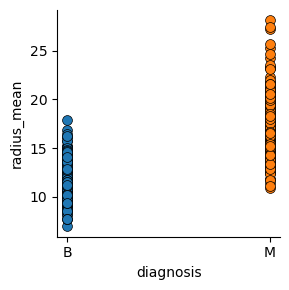

In [40]:
df_bc.diagnosis = df_bc.diagnosis.astype("category")

g = sns.FacetGrid(df_bc, hue="diagnosis")
kws = {"s": 50, "linewidth": 0.5, "edgecolor": "black"}
# kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, "diagnosis", "radius_mean", **kws)


In [41]:
df_bc.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

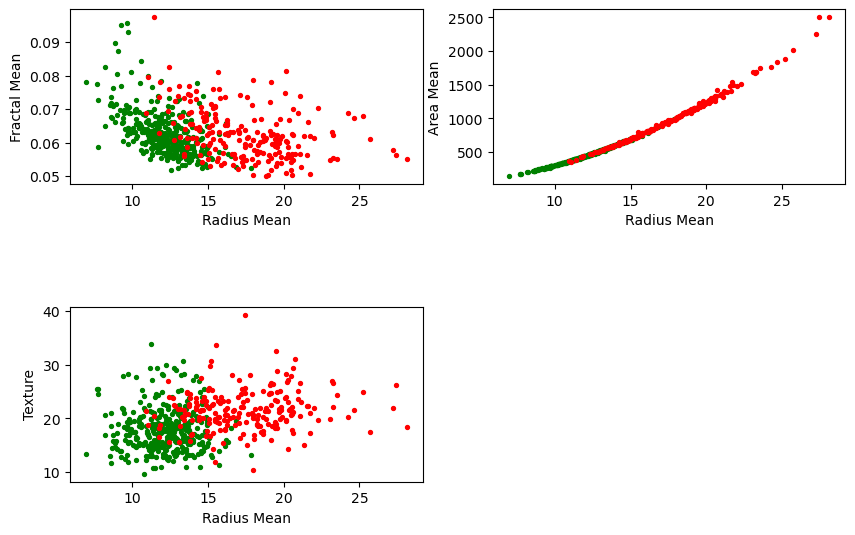

In [42]:
fig_radius = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.7)

ax1 = fig_radius.add_subplot(3, 2, 1)
ax2 = fig_radius.add_subplot(3, 2, 2)
ax3 = fig_radius.add_subplot(3, 2, 3)


ax1.scatter(df_bc_b["radius_mean"], df_bc_b["fractal_dimension_mean"], c="green", s=8)
ax1.scatter(df_bc_m["radius_mean"], df_bc_m["fractal_dimension_mean"], c="red", s=8)
ax1.set_xlabel("Radius Mean"), ax1.set_ylabel("Fractal Mean")

ax2.scatter(df_bc_b["radius_mean"], df_bc_b["area_mean"], c="green", s=8)
ax2.scatter(df_bc_m["radius_mean"], df_bc_m["area_mean"], c="red", s=8)
ax2.set_xlabel("Radius Mean"), ax2.set_ylabel("Area Mean")

ax3.scatter(df_bc_b["radius_mean"], df_bc_b["texture_mean"], c="green", s=8)
ax3.scatter(df_bc_m["radius_mean"], df_bc_m["texture_mean"], c="red", s=8)
ax3.set_xlabel("Radius Mean"), ax3.set_ylabel("Texture")


plt.show()


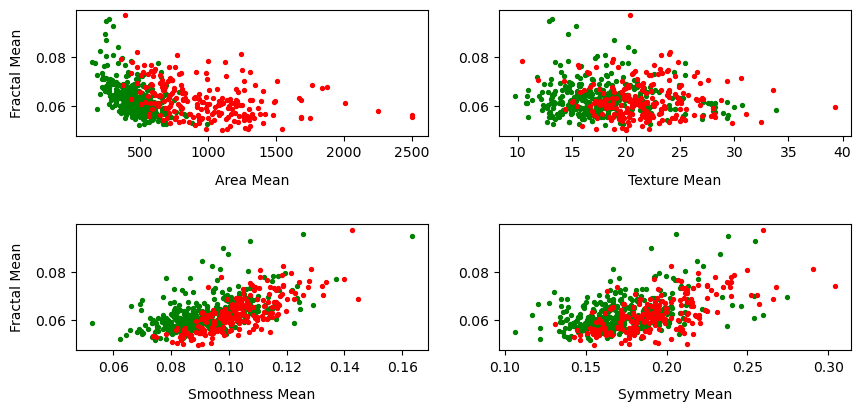

In [43]:
fig_radius = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.7)

ax1 = fig_radius.add_subplot(4, 2, 1)
ax2 = fig_radius.add_subplot(4, 2, 2)
ax3 = fig_radius.add_subplot(4, 2, 3)
ax4 = fig_radius.add_subplot(4, 2, 4)


ax1.scatter(df_bc_b["area_mean"], df_bc_b["fractal_dimension_mean"], c="green", s=8)
ax1.scatter(df_bc_m["area_mean"], df_bc_m["fractal_dimension_mean"], c="red", s=8)
ax1.set_xlabel("Area Mean", labelpad=10), ax1.set_ylabel("Fractal Mean", labelpad=8)

ax2.scatter(df_bc_b["texture_mean"], df_bc_b["fractal_dimension_mean"], c="green", s=8)
ax2.scatter(df_bc_m["texture_mean"], df_bc_m["fractal_dimension_mean"], c="red", s=8)
ax2.set_xlabel("Texture Mean", labelpad=10)

ax3.scatter(
    df_bc_b["smoothness_mean"], df_bc_b["fractal_dimension_mean"], c="green", s=8
)
ax3.scatter(df_bc_m["smoothness_mean"], df_bc_m["fractal_dimension_mean"], c="red", s=8)
ax3.set_xlabel("Smoothness Mean", labelpad=10), ax3.set_ylabel(
    "Fractal Mean", labelpad=8
)

ax4.scatter(df_bc_b["symmetry_mean"], df_bc_b["fractal_dimension_mean"], c="green", s=8)
ax4.scatter(df_bc_m["symmetry_mean"], df_bc_m["fractal_dimension_mean"], c="red", s=8)
ax4.set_xlabel("Symmetry Mean", labelpad=10)

plt.show()


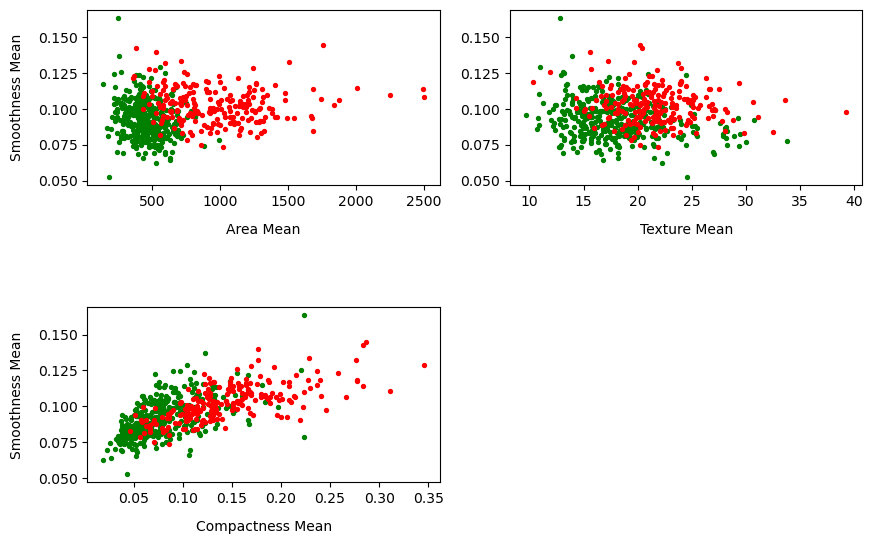

In [44]:
fig_radius = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.7)

ax1 = fig_radius.add_subplot(3, 2, 1)
ax2 = fig_radius.add_subplot(3, 2, 2)
ax3 = fig_radius.add_subplot(3, 2, 3)


ax1.scatter(df_bc_b["area_mean"], df_bc_b["smoothness_mean"], c="green", s=8)
ax1.scatter(df_bc_m["area_mean"], df_bc_m["smoothness_mean"], c="red", s=8)
ax1.set_xlabel("Area Mean", labelpad=10), ax1.set_ylabel("Smoothness Mean", labelpad=10)

ax2.scatter(df_bc_b["texture_mean"], df_bc_b["smoothness_mean"], c="green", s=8)
ax2.scatter(df_bc_m["texture_mean"], df_bc_m["smoothness_mean"], c="red", s=8)
ax2.set_xlabel("Texture Mean", labelpad=10)

ax3.scatter(df_bc_b["compactness_mean"], df_bc_b["smoothness_mean"], c="green", s=8)
ax3.scatter(df_bc_m["compactness_mean"], df_bc_m["smoothness_mean"], c="red", s=8)
ax3.set_xlabel("Compactness Mean", labelpad=10), ax3.set_ylabel(
    "Smoothness Mean", labelpad=10
)


plt.show()
